In [26]:
import numpy as np
import healpy as hp
import pandas as pd
import matplotlib.pyplot as plt
from pixell import enmap, utils, enplot
from astropy.coordinates import SkyCoord

In [27]:
f_GHz = '023'
f_band = 'K'
path_wmap_map_init = f'/scratch/gpfs/SIMONSOBS/users/ar3186/external_data/data/wmap/maps/wmap_car_{f_band}_bundle0_res1.0amin_coords_c.fits'
path_wmap_map_filtered = f'/scratch/gpfs/SIMONSOBS/users/ar3186/external_data/filtered_data/wmap/hm_0_1/satp3/f{f_GHz}/coadded_maps/wmap_car_{f_band}_bundle0_res1.0amin_coords_c_f090_science_filtered.fits'
path_catalog = '/scratch/gpfs/SIMONSOBS/users/ar3186/external_data/data/wmap/point_sources/wmap_ptsrc_catalog_9yr_v5p1.txt'

#### Ps catalog

In [28]:
column_names = ['RA', 'DE', 'GLON', 'GLAT',
    'Flux_K', 'Flux_Ka', 'Flux_Q', 'Flux_V', 'Flux_W',
    'e_Flux_K', 'e_Flux_Ka', 'e_Flux_Q', 'e_Flux_V', 'e_Flux_W',
    'ID5', 'Mflag', 'WMAPID', 'Alpha', 'e_Alpha', 'band_det'
]
df = pd.read_fwf(path_catalog, comment='#', names=column_names)

In [29]:
def convert_ra_string(ra_raw):
    """
    Convert a compact RA string like '408.5' to '00h04m08.5s'.
    """
    ra_raw = f"{float(ra_raw):08.1f}"
    h = ra_raw[:2]
    m = ra_raw[2:4]
    s = ra_raw[-4:]
    return f"{h}h{m}m{s}s"

def convert_dec_string(dec_raw):
    """
    Convert a compact RA string like '-474349' to '-47d43m49s'.
    """
    sign = '-' if str(dec_raw)[0] == '-' else ''
    dec_raw = str(dec_raw).lstrip('-')
    dec_raw = f"{int(dec_raw):06}"
    d = dec_raw[:2]
    m = dec_raw[2:4]
    s = dec_raw[-2:]
    return f"{sign}{d}d{m}m{s}s"

In [30]:
# Select a point source
i_ps = 151
radius = 1. * utils.degree

RA_hhmmss = convert_ra_string(df['RA'][i_ps])
DEC_ddmmss = convert_dec_string(df['DE'][i_ps])

(RA_hhmmss, DEC_ddmmss)

('07h20m06.7s', '-62d21m58s')

In [31]:
# Build a string in hms/dms format
coord = SkyCoord(RA_hhmmss, DEC_ddmmss, frame='icrs')
print("RA (deg):", coord.ra.degree)
print("Dec (deg):", coord.dec.degree)

RA = coord.ra.radian
DEC = coord.dec.radian
print("RA (rad):", RA)
print("Dec (rad):", DEC)

print("Galactic Longitude:", coord.galactic.l.degree)
print("Galactic Latitude:", coord.galactic.b.degree)

RA (deg): 110.02791666666666
Dec (deg): -62.36611111111111
RA (rad): 1.9203494149432774
Dec (rad): -1.0884939805535079
Galactic Longitude: 273.4761498895991
Galactic Latitude: -20.637744333479613


#### Initial map : look around a point source

In [32]:
imap_init = enmap.read_map(path_wmap_map_init)

In [33]:
# enplot.pshow(imap_init[0], downgrade=50, colorbar=True)
# enplot.pshow(imap_init[1], downgrade=50, colorbar=True)
# enplot.pshow(imap_init[2], downgrade=50, colorbar=True)

In [34]:
imap_init_sub = imap_init.submap([[DEC - radius, RA - radius], [DEC + radius, RA + radius]])

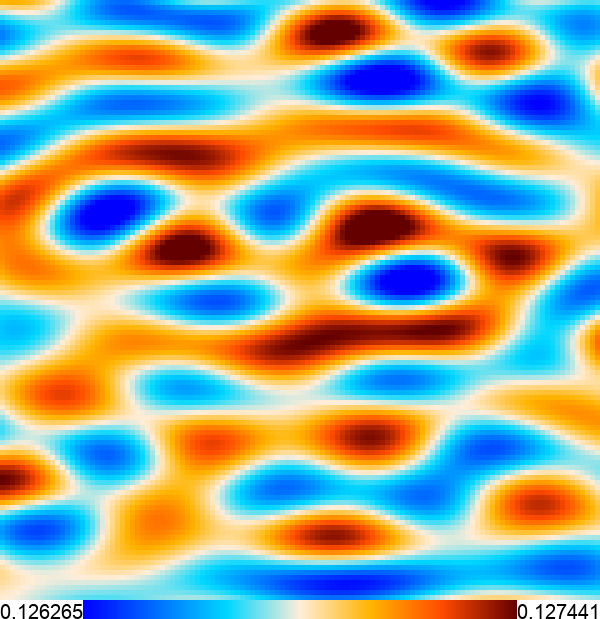

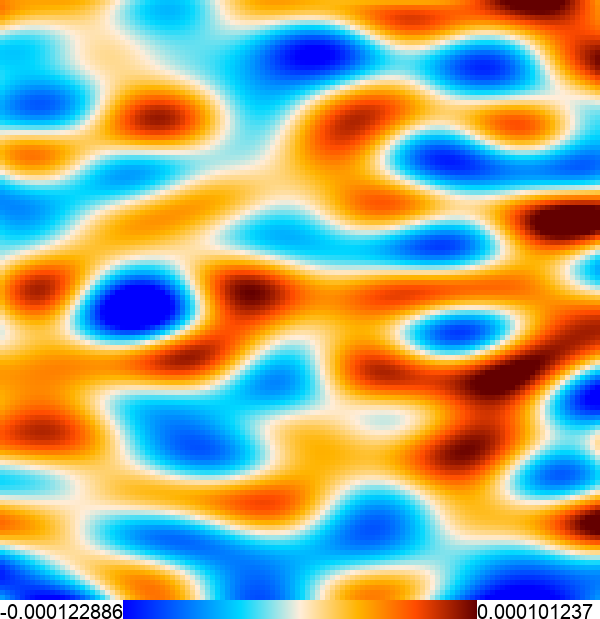

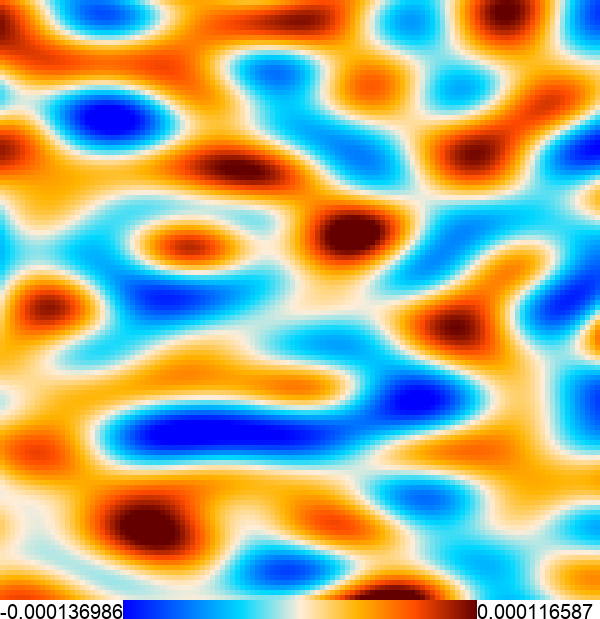

In [35]:
enplot.pshow(imap_init_sub[0], upgrade=5, colorbar=True, grid=False)
enplot.pshow(imap_init_sub[1], upgrade=5, colorbar=True, grid=False)
enplot.pshow(imap_init_sub[2], upgrade=5, colorbar=True, grid=False)

#### Filtered coadded map : look around a point source

In [36]:
imap_filtered = enmap.read_map(path_wmap_map_filtered)

In [37]:
# enplot.pshow(imap_filtered[0], downgrade=5, colorbar=True)
# enplot.pshow(imap_filtered[1], downgrade=5, colorbar=True)
# enplot.pshow(imap_filtered[2], downgrade=5, colorbar=True)

In [38]:
imap_filtered_sub = imap_filtered.submap([[DEC - radius, RA - radius], [DEC + radius, RA + radius]])

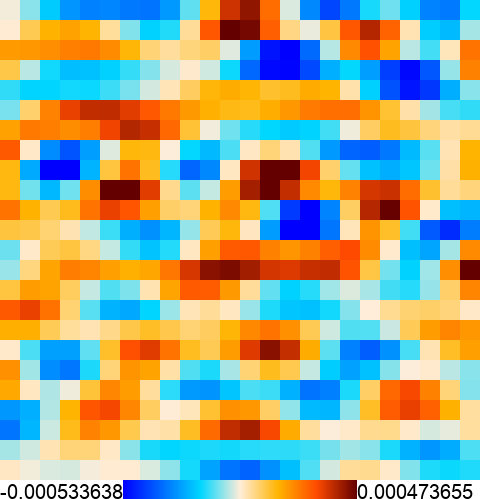

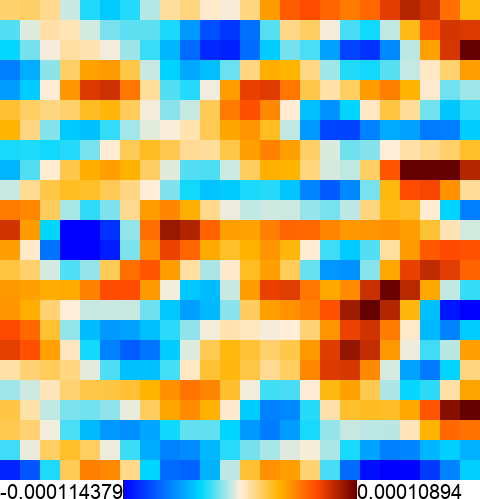

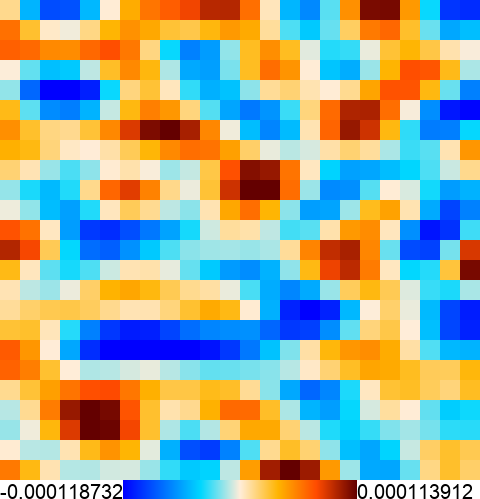

In [39]:
enplot.pshow(imap_filtered_sub[0], upgrade=20, colorbar=True, grid=False)
enplot.pshow(imap_filtered_sub[1], upgrade=20, colorbar=True, grid=False)
enplot.pshow(imap_filtered_sub[2], upgrade=20, colorbar=True, grid=False)